In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import itertools
from math import pi

In [2]:
# create instance of the class "Class"
LambdaCDM1 = Class()
# pass input parameters
LambdaCDM1.set({'omega_b':0.02238280,'omega_cdm':0.12038,'h': 0.6732117,'A_s': 2.100549e-09,'n_s':0.9660499,'tau_reio': 0.05430842})
LambdaCDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM1.compute()
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk1 = [] # P(k) in (Mpc/h)**3
h1 = LambdaCDM1.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk1.append(LambdaCDM1.pk(k*h1,0.)*h1**3) # function .pk(k,z)

cls_lcdm = LambdaCDM1.lensed_cl(2500)
ll_lcdm = cls_lcdm['ell'][2:]
clTT_lcdm = cls_lcdm['tt'][2:]
clEE_lcdm = cls_lcdm['ee'][2:]
clPP_lcdm = cls_lcdm['pp'][2:]
LambdaCDM1.struct_cleanup()

In [3]:
# Definir parámetros cosmológicos comunes
k_out = [0.1]  # unidades de 1/Mpc

In [4]:
#x0=0.001,V0=1, lambda=0.001 no funciona
#x0=0.001,V0=10.0, lambda=0.01 no funciona
#x0=0.001,V0=10.0, lambda=0.015 no funciona

In [5]:
common_settings0 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.1,
    'omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-18,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable0 = [1e-3]
V0_variable0 = [1, 1e1, 1.5e1]
lambda_variable0 = [0.1, 0.15, 0.17, 0.2]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations0 = list(itertools.product(x_variable0, V0_variable0, lambda_variable0))

# Background
z_all0 = []
a_all0 = []
Omega_rad_all0 = []
Omega_bar_all0 = []
Omega_lambda_all0 = []
Omega_sch_all0 = []
w_sch_all0 = []
rho_rel_all0 = []

# Listas para perturbaciones lineales
clTT_all0 = []
clEE_all0 = []
clPP_all0 = []
Pk_all0 = []
ll_all0 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, V0, lam in combinations0:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['V0_schm'] = V0       # Actualizar el valor de V0_schm
    common_settings0['lambda_schm'] = lam  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x},V0={V0}, lambda={lam}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all0.append(z)
    a_all0.append(a)
    Omega_rad_all0.append(Omega_rad)
    Omega_bar_all0.append(Omega_bar)
    Omega_lambda_all0.append(Omega_lambda)
    Omega_sch_all0.append(Omega_sch)
    w_sch_all0.append(w_sch)
    rho_rel_all0.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all0.append(clTT)
    clEE_all0.append(clEE)
    clPP_all0.append(clPP)
    ll_all0.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all0.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, V0={V0}, lambda={lam}")
    

# Graficar los resultados
print("cálculos terminados")



iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.1
El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.1
iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.15


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.85472
aquí voy y todo bien 2.27559
aquí voy y todo bien 2.06515
aquí voy y todo bien 2.09248
aquí voy y todo bien 2.07882
aquí voy y todo bien 2.09248
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.85238
aquí voy y todo bien 2.26484
aquí voy y todo bien 2.05861
aquí voy y todo bien 2.08558
aquí voy y todo bien 2.0721
aquí voy y todo bien 2.08558


El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.15
iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.85197
aquí voy y todo bien 2.26295
aquí voy y todo bien 2.05746
aquí voy y todo bien 2.08436
aquí voy y todo bien 2.07091
aquí voy y todo bien 2.08436
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.85157
aquí voy y todo bien 2.26112
aquí voy y todo bien 2.05634
aquí voy y todo bien 2.08318
aquí voy y todo bien 2.06976
aquí voy y todo bien 2.08318


El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.17
iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.2
El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.2
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.89289
aquí voy y todo bien 2.46812
aquí voy y todo bien 2.1805
aquí voy y todo bien 2.21356
aquí voy y todo bien 2.19703
aquí voy y todo bien 2.21352
aquí voy y todo bien 2.20527
aquí voy y todo bien 2.21352


El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.1
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.15
El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.15
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.86924
aquí voy y todo bien 2.3449
aquí voy y todo bien 2.10707
aquí voy y todo bien 2.13665
aquí voy y todo bien 2.12186
aquí voy y todo bien 2.13662
aquí voy y todo bien 2.12924
aquí voy y todo bien 2.13662
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.86508
aquí voy y todo bien 2.32457
aquí voy y todo bien 2.09483
aquí voy y todo bien 2.12377
aquí voy y todo bien 2.1093
aquí voy y todo bien 2.12374
aquí voy y todo bien 2.12376
aquí voy y todo bien 2.12374


El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.17
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.2
El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.2
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.86103
aquí voy y todo bien 2.30515
aquí voy y todo bien 2.08309
aquí voy y todo bien 2.1114
aquí voy y todo bien 2.09725
aquí voy y todo bien 2.1114
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.91441
aquí voy y todo bien 2.59256
aquí voy y todo bien 2.25348
aquí voy y todo bien 2.2894
aquí voy y todo bien 2.27144
aquí voy y todo bien 2.28935
aquí voy y todo bien 2.28938
aquí voy y todo bien 2.28935


El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.1
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.15


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.87866
aquí voy y todo bien 2.39235
aquí voy y todo bien 2.1355
aquí voy y todo bien 2.16651
aquí voy y todo bien 2.15101
aquí voy y todo bien 2.16648
aquí voy y todo bien 2.16649
aquí voy y todo bien 2.16648


El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.15
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.8724
aquí voy y todo bien 2.36056
aquí voy y todo bien 2.11648
aquí voy y todo bien 2.14654
aquí voy y todo bien 2.13151
aquí voy y todo bien 2.14651
aquí voy y todo bien 2.14653
aquí voy y todo bien 2.14651
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.86631
aquí voy y todo bien 2.3305
aquí voy y todo bien 2.09841
aquí voy y todo bien 2.12753
aquí voy y todo bien 2.11297
aquí voy y todo bien 2.12751
aquí voy y todo bien 2.12024
aquí voy y todo bien 2.12751


El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.17
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.2
El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.2
cálculos terminados


In [6]:
combinations0

[(0.001, 1, 0.1),
 (0.001, 1, 0.15),
 (0.001, 1, 0.17),
 (0.001, 1, 0.2),
 (0.001, 10.0, 0.1),
 (0.001, 10.0, 0.15),
 (0.001, 10.0, 0.17),
 (0.001, 10.0, 0.2),
 (0.001, 15.0, 0.1),
 (0.001, 15.0, 0.15),
 (0.001, 15.0, 0.17),
 (0.001, 15.0, 0.2)]

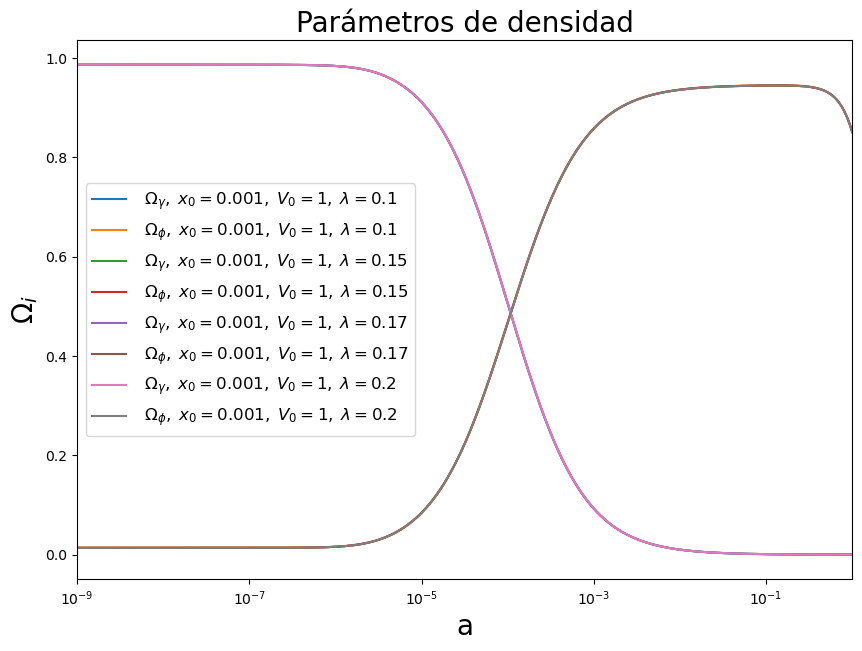

In [7]:
plt.figure(figsize=(10, 7))
plt.xscale("log")
plt.xlim(1e-9, 1)
for i, (x, V0, lam) in enumerate(combinations0[:4]):
    plt.plot(a_all0[i], Omega_rad_all0[i], label=f" $\Omega _{{\gamma}}, \; x_0 = {x}, \; V_0 = {V0}, \; \lambda = {lam}$")
    plt.plot(a_all0[i], Omega_sch_all0[i], label=f" $\Omega _{{\phi}}, \; x_0 = {x}, \; V_0 = {V0}, \; \lambda = {lam}$")
    
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a', fontsize=20)
plt.ylabel('$\Omega _{i}$', fontsize=20)
plt.legend(fontsize=12)

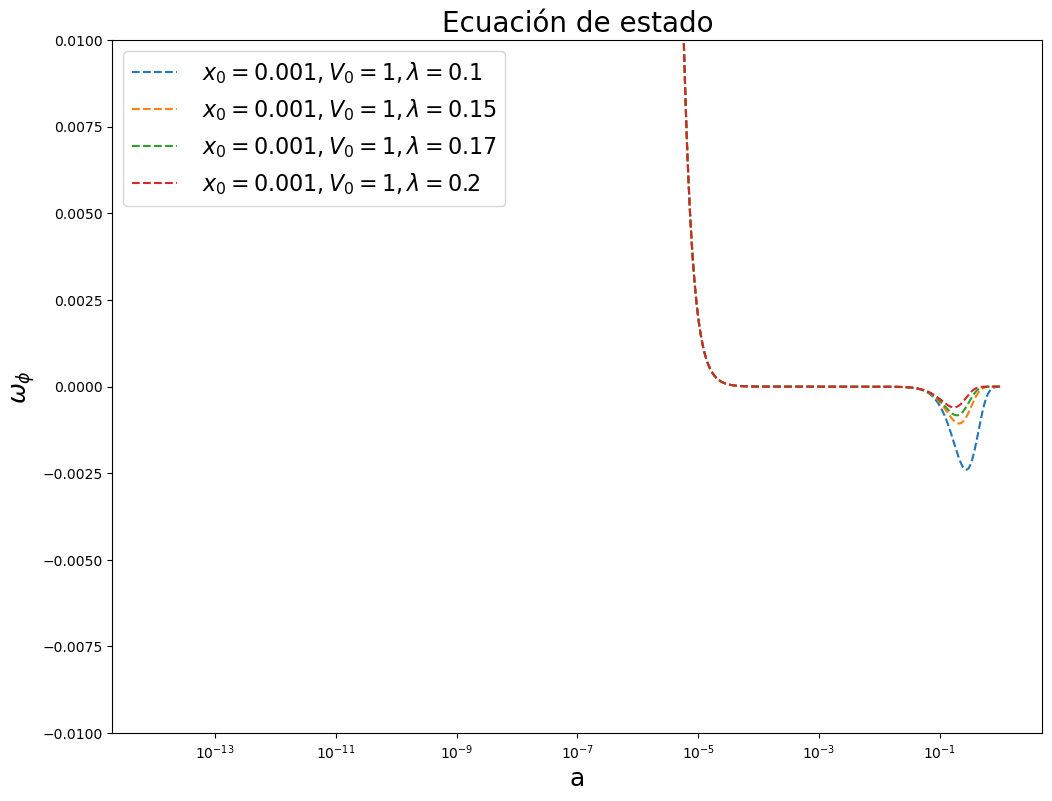

In [8]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations0[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

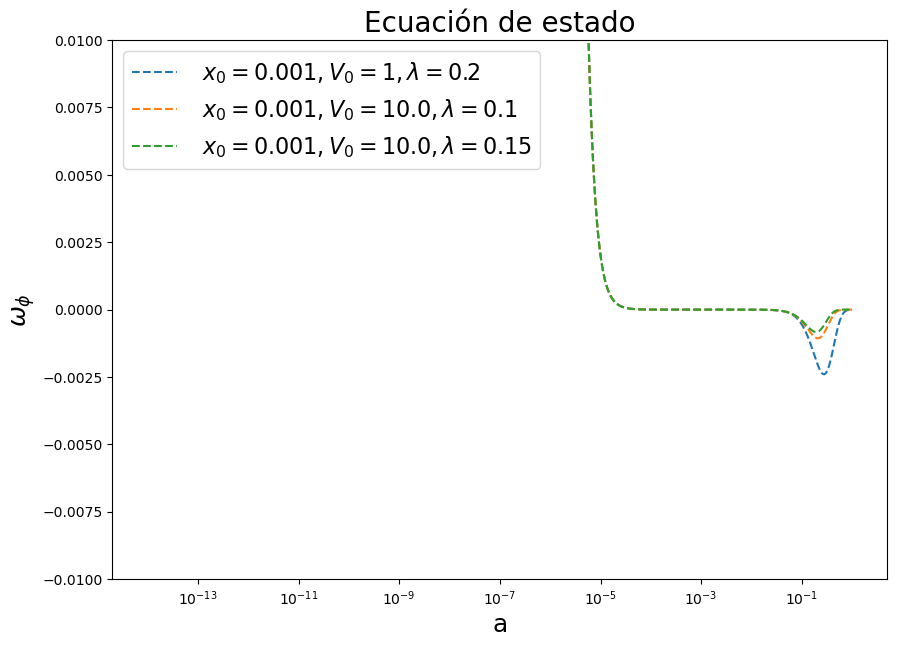

In [9]:
#plt.yscale("log")
plt.figure(figsize=(10, 7))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations0[3:6]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

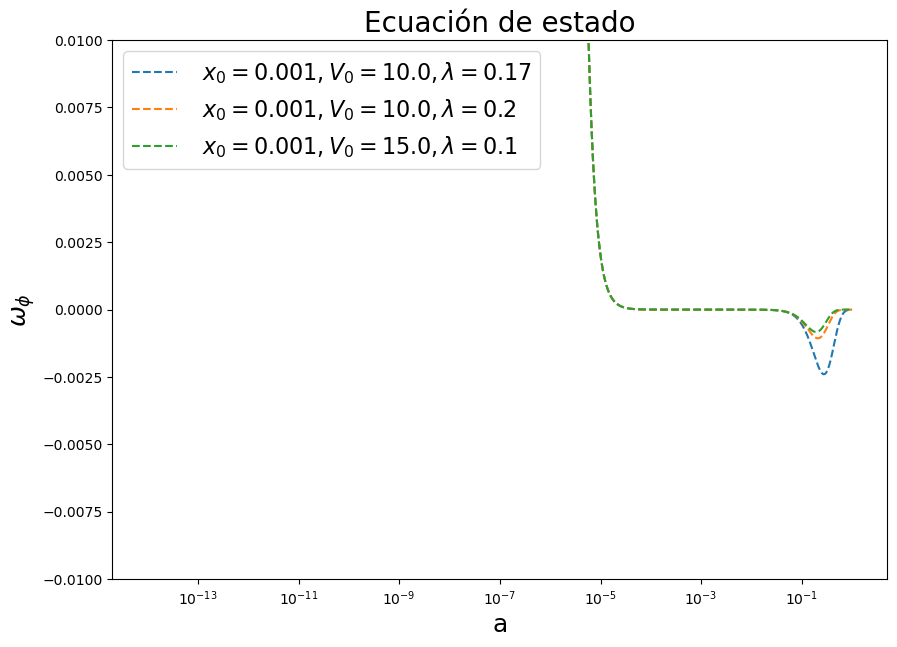

In [10]:
#plt.yscale("log")
plt.figure(figsize=(10, 7))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations0[6:9]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

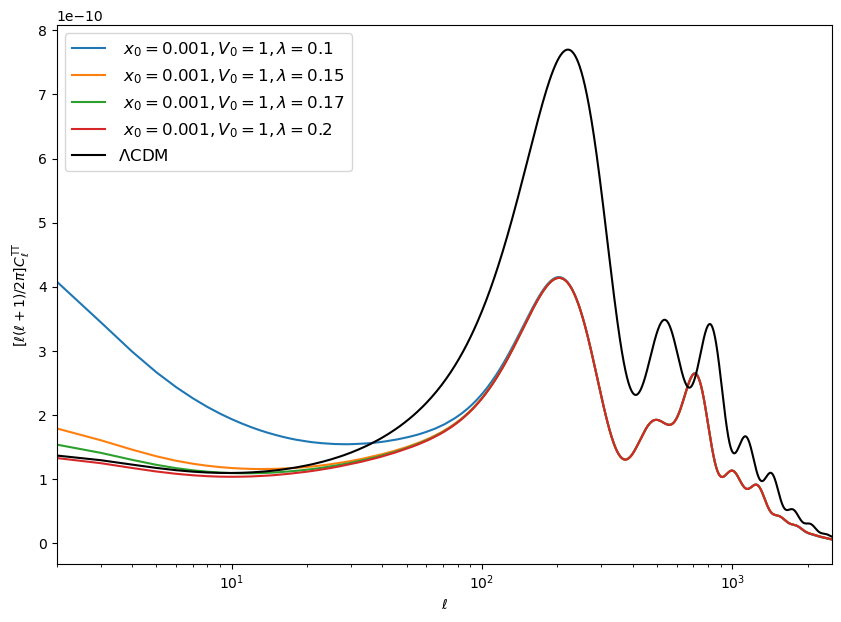

In [11]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations0[:4]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")


plt.legend(fontsize=12)
plt.show()

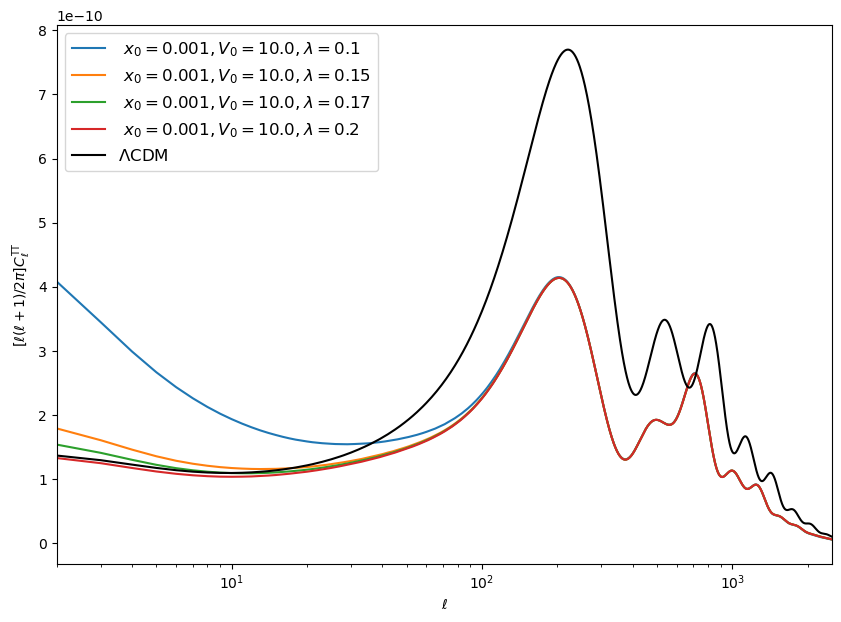

In [12]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations0[4:8]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

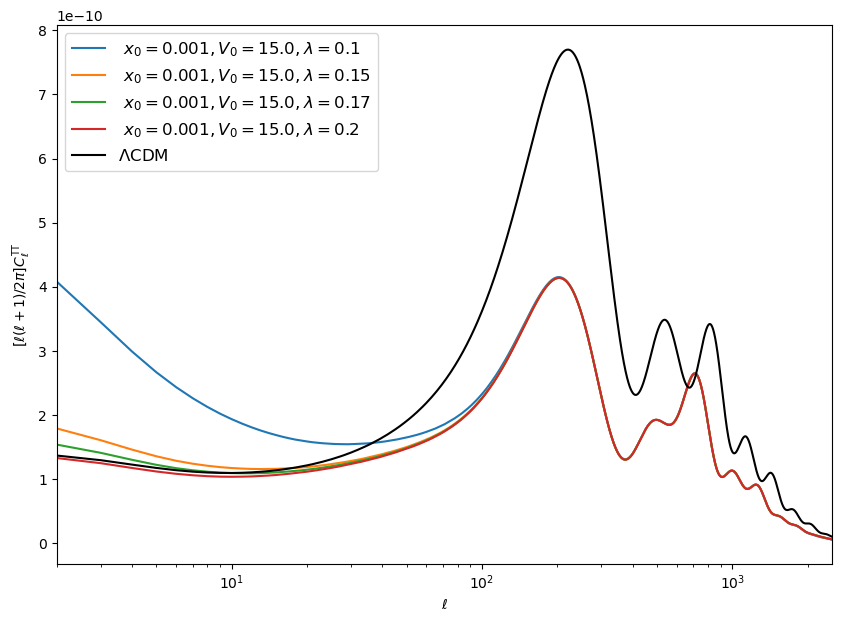

In [13]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations0[8:12]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

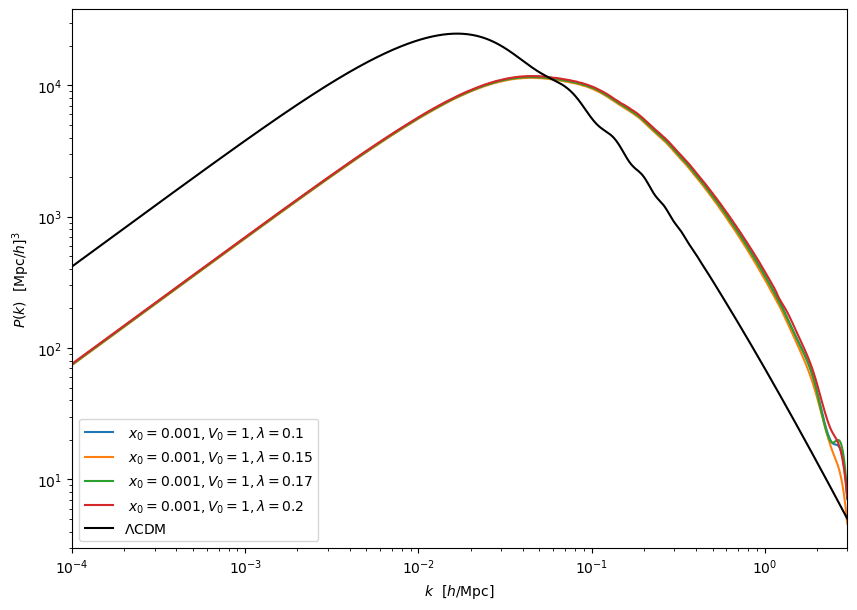

In [14]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, V0, lam) in enumerate(combinations0[:4]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

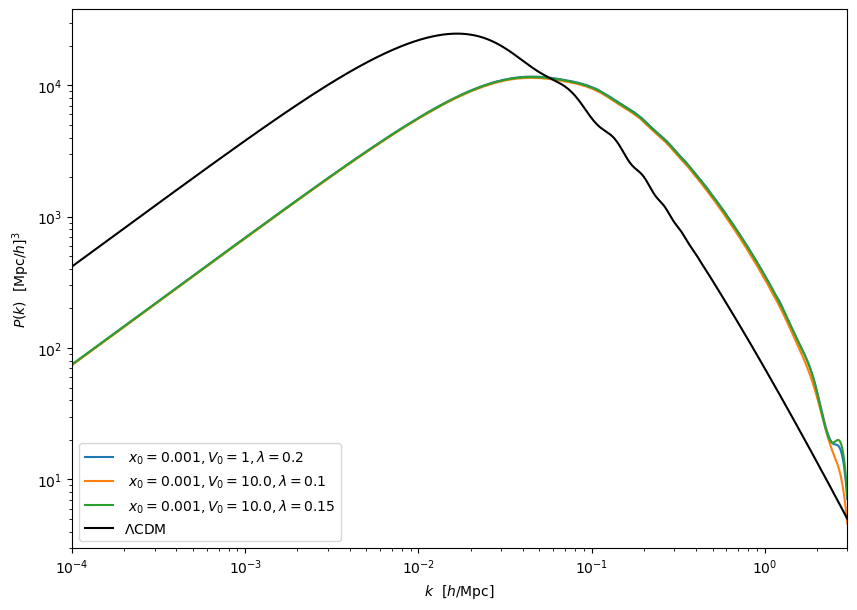

In [15]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, V0, lam) in enumerate(combinations0[3:6]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

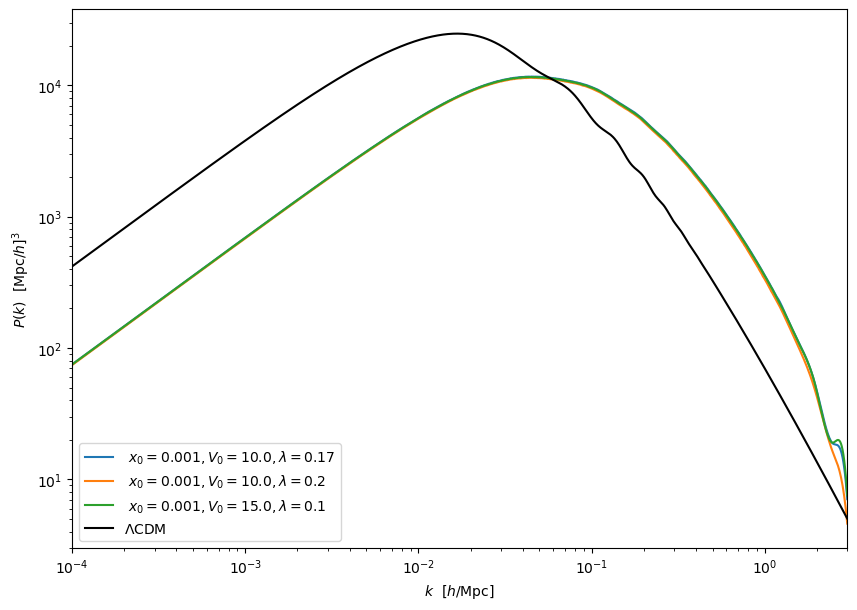

In [16]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, V0, lam) in enumerate(combinations0[6:9]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [17]:
common_settings1 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-18,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable1 = [0.01]
V0_variable1 = [1, 5, 1e1]
lambda_variable1 = [0.05, 0.07, 0.1,0.2]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations1 = list(itertools.product(x_variable1, V0_variable1, lambda_variable1))

# Background
z_all1 = []
a_all1 = []
Omega_rad_all1 = []
Omega_bar_all1 = []
Omega_lambda_all1 = []
Omega_sch_all1 = []
w_sch_all1 = []
rho_rel_all1 = []

# Listas para perturbaciones lineales
clTT_all1 = []
clEE_all1 = []
clPP_all1 = []
Pk_all1 = []
ll_all1 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x1, V01, lam1 in combinations1:
    common_settings1['x0_schm'] = x1        # Actualizar el valor de x0_schm
    common_settings1['V0_schm'] = V01       # Actualizar el valor de V0_schm
    common_settings1['lambda_schm'] = lam1  # Actualizar el valor de lambda_schm
    
    print(f"Iniciando cálculos con la combinación: x0={x1},V0={V01}, lambda={lam1}")
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings1)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all1.append(z)
    a_all1.append(a)
    Omega_rad_all1.append(Omega_rad)
    Omega_bar_all1.append(Omega_bar)
    Omega_lambda_all1.append(Omega_lambda)
    Omega_sch_all1.append(Omega_sch)
    w_sch_all1.append(w_sch)
    rho_rel_all1.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all1.append(clTT)
    clEE_all1.append(clEE)
    clPP_all1.append(clPP)
    ll_all1.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all1.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x1},V0={V01}, lambda={lam1}")
    

# Graficar los resultados

print("cálculos terminados")



Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.05
El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.05
Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.07


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26122
aquí voy y todo bien 2.76274
aquí voy y todo bien 2.01198
aquí voy y todo bien 2.08642
aquí voy y todo bien 2.0492
aquí voy y todo bien 2.08567
aquí voy y todo bien 2.06744
aquí voy y todo bien 2.08567
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26088
aquí voy y todo bien 2.75746
aquí voy y todo bien 2.00917
aquí voy y todo bien 2.08367
aquí voy y todo bien 2.04642
aquí voy y todo bien 2.08292
aquí voy y todo bien 2.0833
aquí voy y todo bien 2.08292


El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.07
Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2607
aquí voy y todo bien 2.75467
aquí voy y todo bien 2.00768
aquí voy y todo bien 2.08222
aquí voy y todo bien 2.04495
aquí voy y todo bien 2.08147
aquí voy y todo bien 2.06321
aquí voy y todo bien 2.08147


El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.1
Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.2
El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.2
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.05


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26056
aquí voy y todo bien 2.75267
aquí voy y todo bien 2.00662
aquí voy y todo bien 2.08117
aquí voy y todo bien 2.0439
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.06216
aquí voy y todo bien 2.08043
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26402
aquí voy y todo bien 2.80656
aquí voy y todo bien 2.03529
aquí voy y todo bien 2.10915
aquí voy y todo bien 2.07222
aquí voy y todo bien 2.10838
aquí voy y todo bien 2.10877
aquí voy y todo bien 2.10838
aquí voy y todo bien 1
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.05
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.07


aquí voy y todo bien 1.2623
aquí voy y todo bien 2.77952
aquí voy y todo bien 2.02091
aquí voy y todo bien 2.09514
aquí voy y todo bien 2.05803
aquí voy y todo bien 2.09438
aquí voy y todo bien 2.0762
aquí voy y todo bien 2.09438
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2614
aquí voy y todo bien 2.76541
aquí voy y todo bien 2.0134
aquí voy y todo bien 2.08781
aquí voy y todo bien 2.05061
aquí voy y todo bien 2.08706
aquí voy y todo bien 2.08744
aquí voy y todo bien 2.08706


El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.07
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.1
El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.1
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.2


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26074
aquí voy y todo bien 2.75535
aquí voy y todo bien 2.00805
aquí voy y todo bien 2.08257
aquí voy y todo bien 2.04531
aquí voy y todo bien 2.08183
aquí voy y todo bien 2.06357
aquí voy y todo bien 2.08183


El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.2
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.05
El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.05
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.07


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26753
aquí voy y todo bien 2.86327
aquí voy y todo bien 2.0654
aquí voy y todo bien 2.13838
aquí voy y todo bien 2.10189
aquí voy y todo bien 2.13759
aquí voy y todo bien 2.13799
aquí voy y todo bien 2.13759
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26409
aquí voy y todo bien 2.80758
aquí voy y todo bien 2.03583
aquí voy y todo bien 2.10969
aquí voy y todo bien 2.07276
aquí voy y todo bien 2.10892
aquí voy y todo bien 2.09084
aquí voy y todo bien 2.10892


El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.07
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.1
El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.1
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.2


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26227
aquí voy y todo bien 2.77895
aquí voy y todo bien 2.02061
aquí voy y todo bien 2.09485
aquí voy y todo bien 2.05774
aquí voy y todo bien 2.0941
aquí voy y todo bien 2.09448
aquí voy y todo bien 2.0941
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.2
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1.26096
aquí voy y todo bien 2.75871
aquí voy y todo bien 2.00983
aquí voy y todo bien 2.08433
aquí voy y todo bien 2.04708
aquí voy y todo bien 2.08358
aquí voy y todo bien 2.08395
aquí voy y todo bien 2.08358


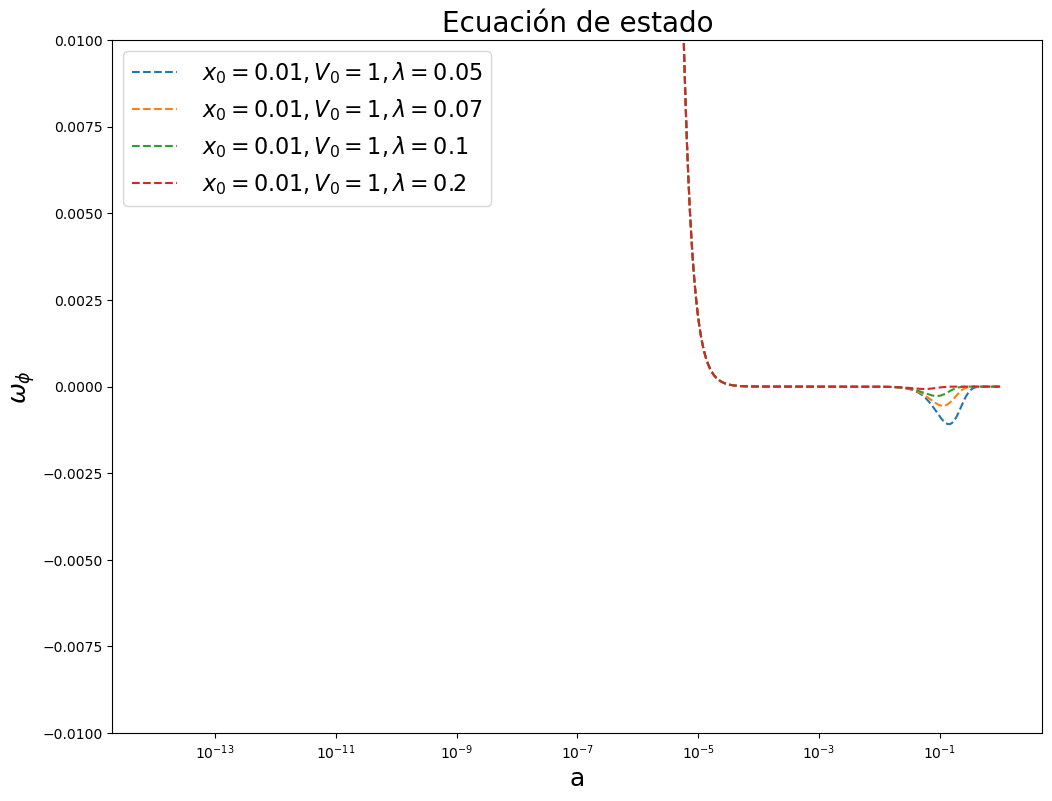

In [18]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations1[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all1[i], w_sch_all1[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

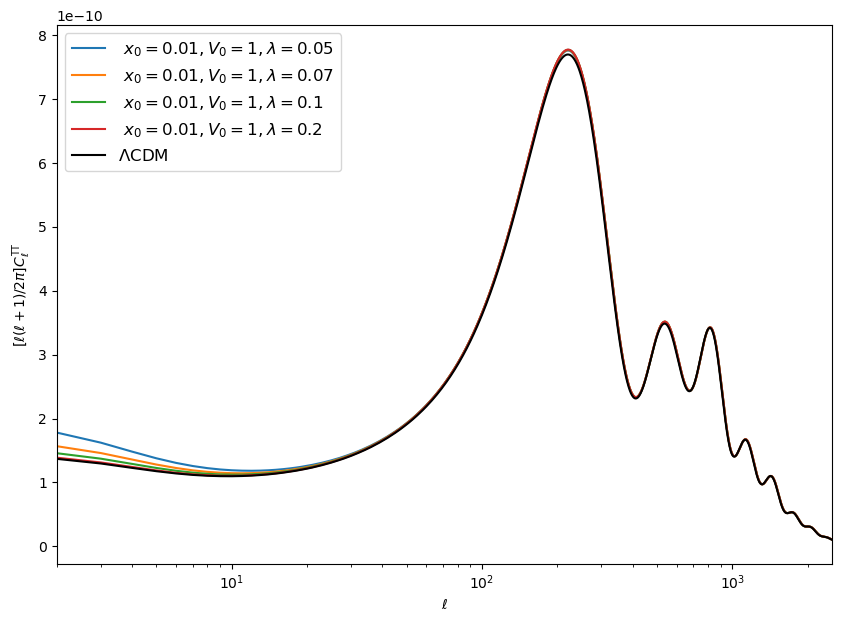

In [19]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x1, V01, lam1) in enumerate(combinations1[:4]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")
#plt.plot(ll,clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

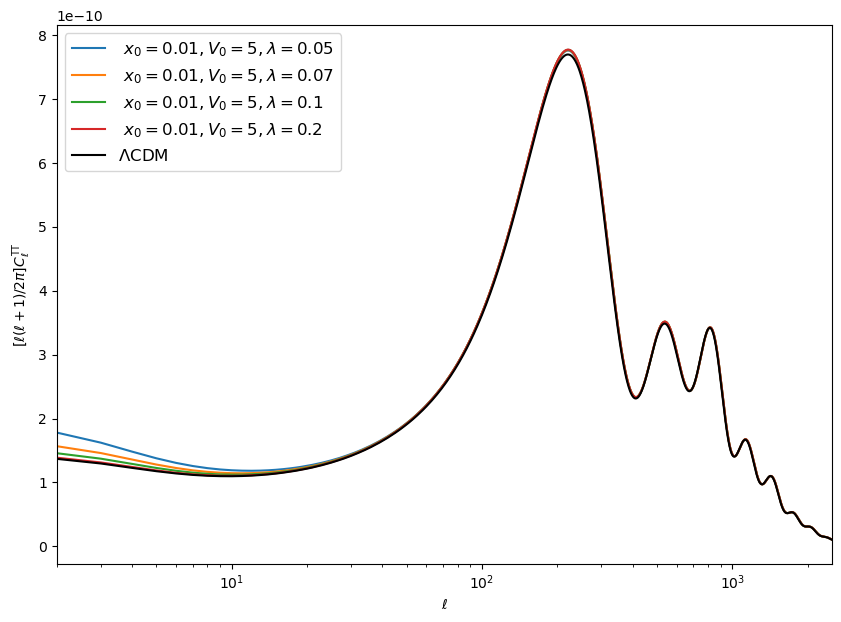

In [20]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x1, V01, lam1) in enumerate(combinations1[4:8]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

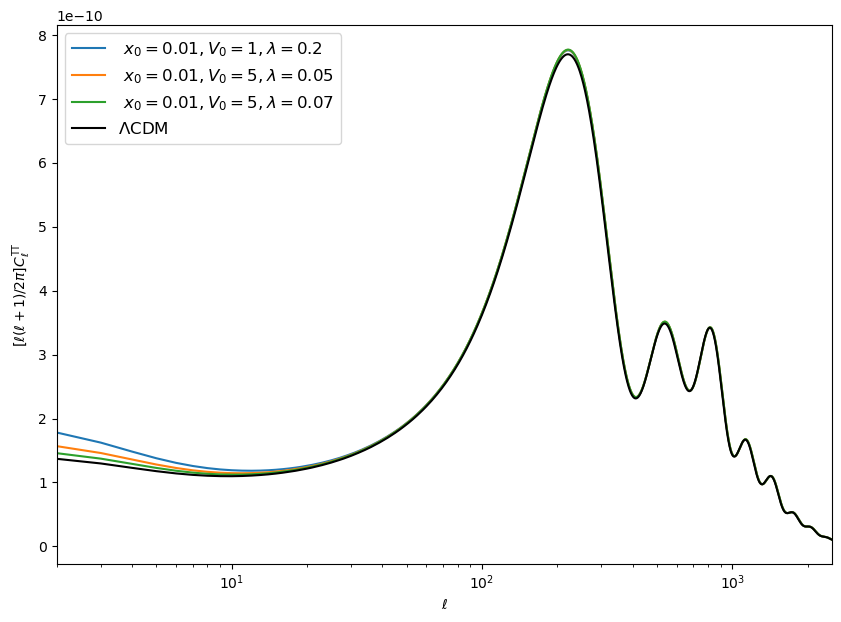

In [21]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x1, V01, lam1) in enumerate(combinations1[3:6]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

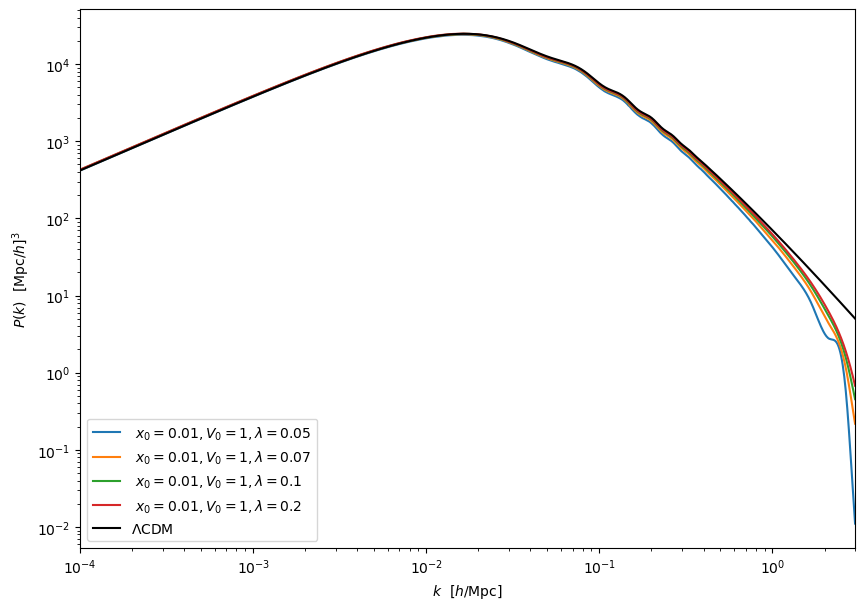

In [22]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x1, V01, lam1) in enumerate(combinations1[:4]):
    plt.plot(kk,Pk_all1[i], label = f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [23]:
common_settings2 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-18,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable2 = [0.1]
V0_variable2 = [1, 1e1, 2e1]
lambda_variable2 = [0.007, 0.009, 0.01, 0.1]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations2 = list(itertools.product(x_variable2, V0_variable2, lambda_variable2))

# Background
z_all2 = []
a_all2 = []
Omega_rad_all2 = []
Omega_bar_all2 = []
Omega_lambda_all2 = []
Omega_sch_all2 = []
w_sch_all2 = []
rho_rel_all2 = []

# Listas para perturbaciones lineales
clTT_all2 = []
clEE_all2 = []
clPP_all2 = []
Pk_all2 = []
ll_all2 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x2, V02, lam2 in combinations2:
    common_settings2['x0_schm'] = x2        # Actualizar el valor de x0_schm
    common_settings2['V0_schm'] = V02       # Actualizar el valor de V0_schm
    common_settings2['lambda_schm'] = lam2  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x2},V0={V02}, lambda={lam2}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings2)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all2.append(z)
    a_all2.append(a)
    Omega_rad_all2.append(Omega_rad)
    Omega_bar_all2.append(Omega_bar)
    Omega_lambda_all2.append(Omega_lambda)
    Omega_sch_all2.append(Omega_sch)
    w_sch_all2.append(w_sch)
    rho_rel_all2.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all2.append(clTT)
    clEE_all2.append(clEE)
    clPP_all2.append(clPP)
    ll_all2.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all2.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x2},V0={V02}, lambda={lam2}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.007
El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.007
iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.009


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26416
aquí voy y todo bien 2.80909
aquí voy y todo bien 2.03662
aquí voy y todo bien 2.11043
aquí voy y todo bien 2.07353
aquí voy y todo bien 2.10966
aquí voy y todo bien 2.09159
aquí voy y todo bien 2.10966
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26269
aquí voy y todo bien 2.78583
aquí voy y todo bien 2.02426
aquí voy y todo bien 2.09841
aquí voy y todo bien 2.06134
aquí voy y todo bien 2.09765
aquí voy y todo bien 2.09803
aquí voy y todo bien 2.09765
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26228
aquí voy y todo bien 2.77924
aquí voy y todo bien 2.02076
aquí voy y todo bien 2.09499
aquí voy y todo bien 2.05788
aquí voy y todo bien 2.09424
aquí voy y todo bien 2.07606
aquí voy y todo bien 2.09424


El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.009
iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.01
El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26054
aquí voy y todo bien 2.75226
aquí voy y todo bien 2.0064
aquí voy y todo bien 2.08097
aquí voy y todo bien 2.04368
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.06195
aquí voy y todo bien 2.08022


El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.1
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29761
aquí voy y todo bien 3.45045
aquí voy y todo bien 2.37403
aquí voy y todo bien 2.42905
aquí voy y todo bien 2.40154
aquí voy y todo bien 2.42823
aquí voy y todo bien 2.42864
aquí voy y todo bien 2.42823
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28252
aquí voy y todo bien 3.13145
aquí voy y todo bien 2.20698
aquí voy y todo bien 2.27375
aquí voy y todo bien 2.24037
aquí voy y todo bien 2.2729
aquí voy y todo bien 2.25663
aquí voy y todo bien 2.2729


El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.007
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.009
El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.009
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.27824
aquí voy y todo bien 3.05051
aquí voy y todo bien 2.16437
aquí voy y todo bien 2.23337
aquí voy y todo bien 2.19887
aquí voy y todo bien 2.23252
aquí voy y todo bien 2.2157
aquí voy y todo bien 2.23252


El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.1
El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.1
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2607
aquí voy y todo bien 2.75469
aquí voy y todo bien 2.00769
aquí voy y todo bien 2.08223
aquí voy y todo bien 2.04496
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06322
aquí voy y todo bien 2.08148
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.33636
aquí voy y todo bien 4.60731
aquí voy y todo bien 2.97183
aquí voy y todo bien 2.95269
aquí voy y todo bien 2.96226
aquí voy y todo bien 2.95307
aquí voy y todo bien 2.95767
aquí voy y todo bien 2.95307


El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.007
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.009
El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.009
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.30509
aquí voy y todo bien 3.62903
aquí voy y todo bien 2.46706
aquí voy y todo bien 2.51426
aquí voy y todo bien 2.49066
aquí voy y todo bien 2.51348
aquí voy y todo bien 2.50207
aquí voy y todo bien 2.51348
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29634
aquí voy y todo bien 3.41983
aquí voy y todo bien 2.35808
aquí voy y todo bien 2.41475
aquí voy y todo bien 2.38641
aquí voy y todo bien 2.41389
aquí voy y todo bien 2.41432
aquí voy y todo bien 2.41389


El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.01
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.1
El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.1
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26088
aquí voy y todo bien 2.75739
aquí voy y todo bien 2.00913
aquí voy y todo bien 2.08364
aquí voy y todo bien 2.04638
aquí voy y todo bien 2.08289
aquí voy y todo bien 2.06464
aquí voy y todo bien 2.08289


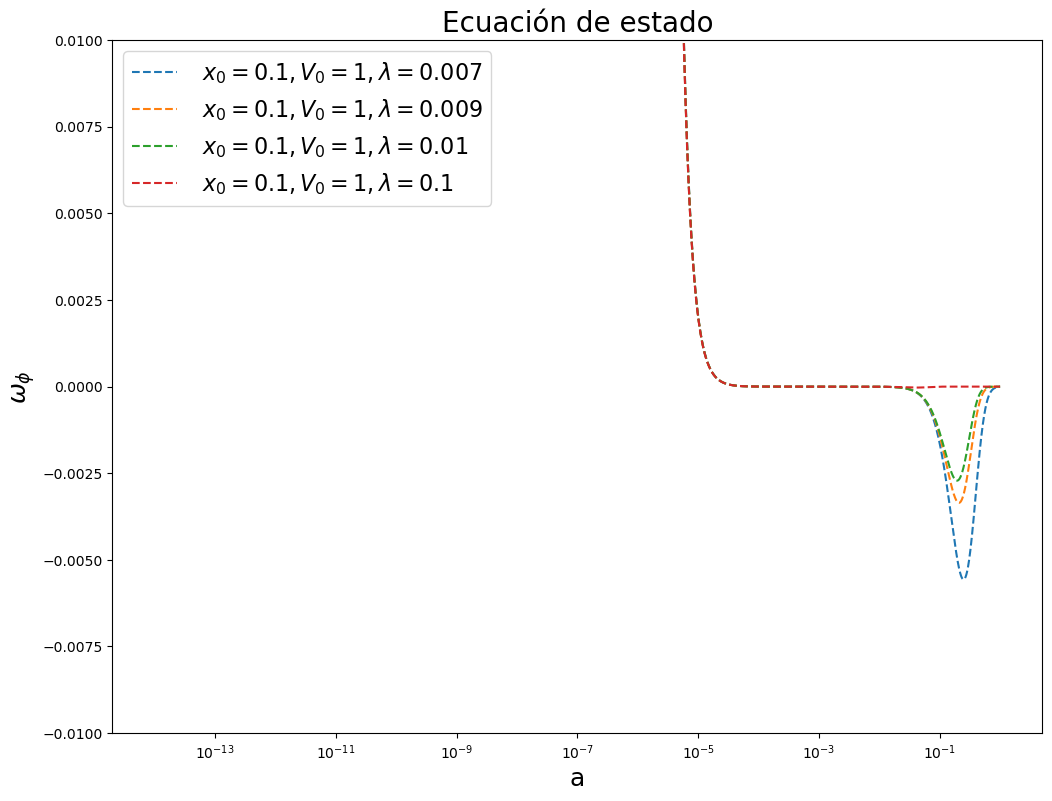

In [24]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations2[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all2[i], w_sch_all2[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.ylim(-0.01,0.01)
plt.legend(fontsize=16)

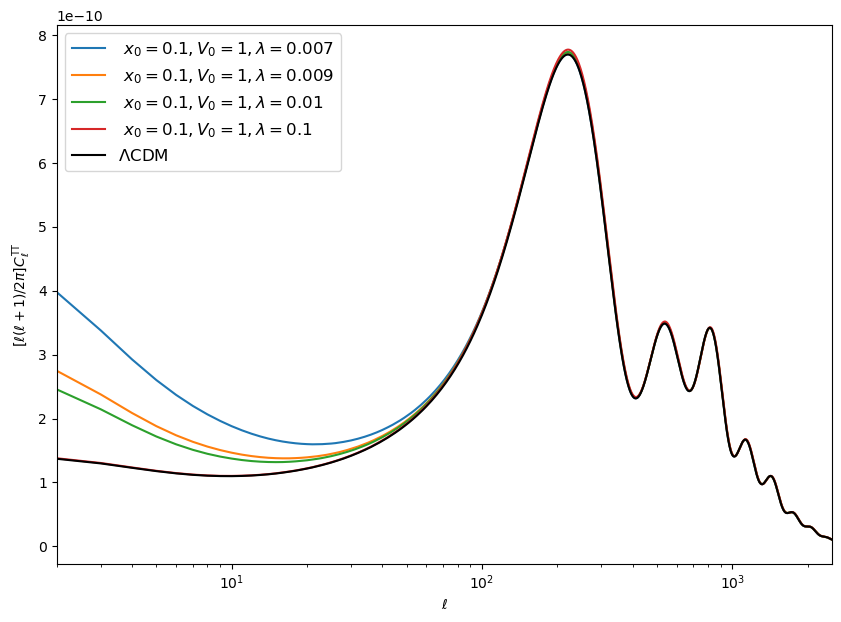

In [25]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x2, V02, lam2) in enumerate(combinations2[:4]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x2}, V_0 = {V02}, \lambda = {lam2}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

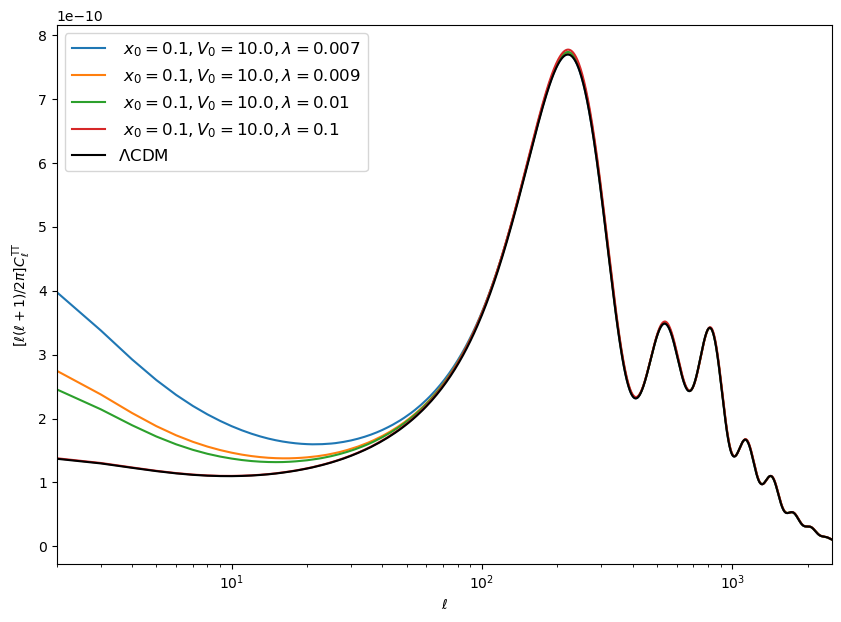

In [26]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x2, V02, lam2) in enumerate(combinations2[4:8]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x2}, V_0 = {V02}, \lambda = {lam2}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

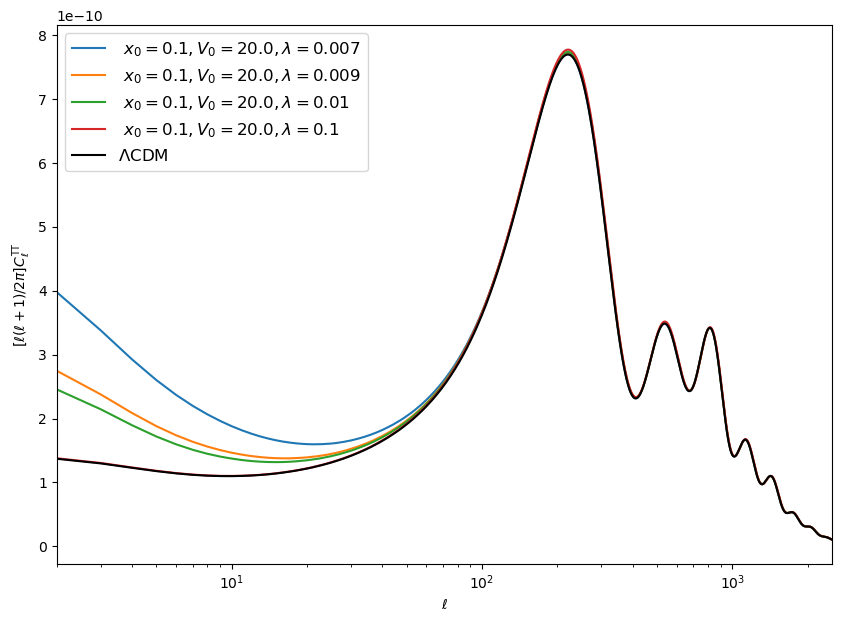

In [27]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x2, V02, lam2) in enumerate(combinations2[8:12]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x2}, V_0 = {V02}, \lambda = {lam2}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

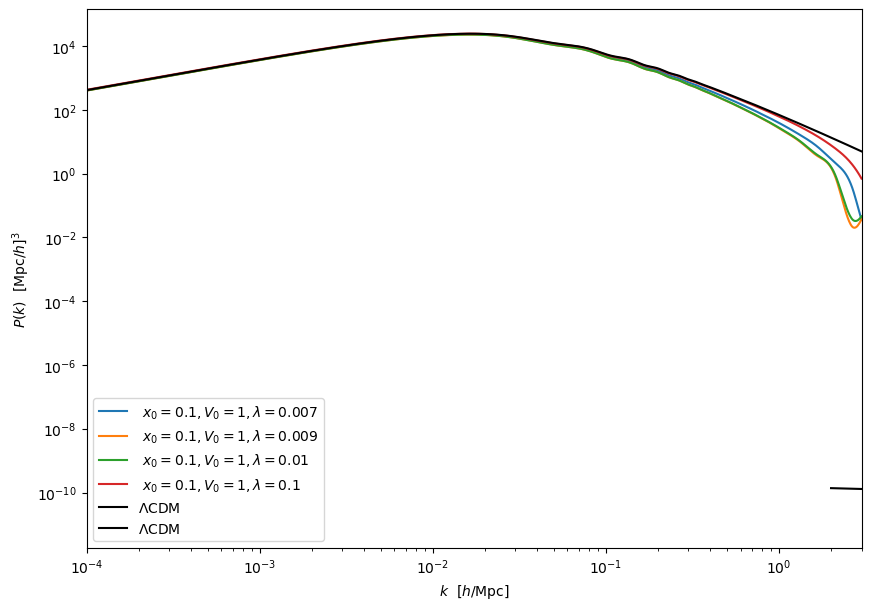

In [28]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x02, V02, lam2) in enumerate(combinations2[:4]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x02}, V_0 = {V02}, \lambda = {lam2}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

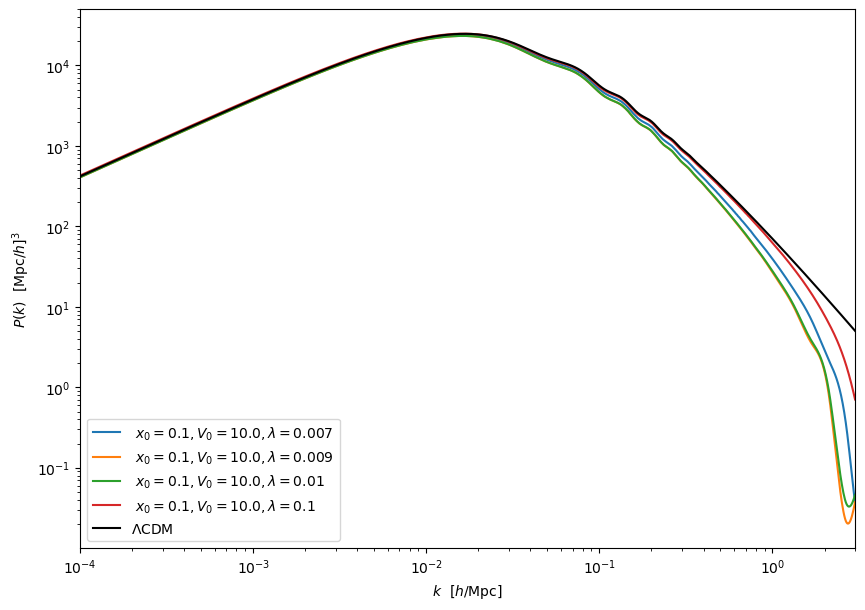

In [29]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x02, V02, lam2) in enumerate(combinations2[4:8]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x02}, V_0 = {V02}, \lambda = {lam2}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [30]:
common_settings3 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-18,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable3 = [1]
V0_variable3 = [1, 1e1, 2e1]
lambda_variable3 = [0.005, 0.007, 0.009, 0.01]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations3 = list(itertools.product(x_variable3, V0_variable3, lambda_variable3))

# Background
z_all3 = []
a_all3 = []
Omega_rad_all3 = []
Omega_bar_all3 = []
Omega_lambda_all3 = []
Omega_sch_all3 = []
w_sch_all3 = []
rho_rel_all3 = []

# Listas para perturbaciones lineales
clTT_all3 = []
clEE_all3 = []
clPP_all3 = []
Pk_all3 = []
ll_all3 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x3, V03, lam3 in combinations3:
    common_settings3['x0_schm'] = x3        # Actualizar el valor de x0_schm
    common_settings3['V0_schm'] = V03       # Actualizar el valor de V0_schm
    common_settings3['lambda_schm'] = lam3  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x3},V0={V03}, lambda={lam3}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings3)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all3.append(z)
    a_all3.append(a)
    Omega_rad_all3.append(Omega_rad)
    Omega_bar_all3.append(Omega_bar)
    Omega_lambda_all3.append(Omega_lambda)
    Omega_sch_all3.append(Omega_sch)
    w_sch_all3.append(w_sch)
    rho_rel_all3.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all3.append(clTT)
    clEE_all3.append(clEE)
    clPP_all3.append(clPP)
    ll_all3.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all3.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x3},V0={V03}, lambda={lam3}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.005
El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.005
iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26122
aquí voy y todo bien 2.76274
aquí voy y todo bien 2.01198
aquí voy y todo bien 2.08642
aquí voy y todo bien 2.0492
aquí voy y todo bien 2.08567
aquí voy y todo bien 2.06744
aquí voy y todo bien 2.08567
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26088
aquí voy y todo bien 2.75746
aquí voy y todo bien 2.00917
aquí voy y todo bien 2.08367
aquí voy y todo bien 2.04642
aquí voy y todo bien 2.08292
aquí voy y todo bien 2.0833
aquí voy y todo bien 2.08292


El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.007
iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.009
El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.009
iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26074
aquí voy y todo bien 2.7553
aquí voy y todo bien 2.00802
aquí voy y todo bien 2.08255
aquí voy y todo bien 2.04528
aquí voy y todo bien 2.0818
aquí voy y todo bien 2.06354
aquí voy y todo bien 2.0818
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2607
aquí voy y todo bien 2.75467
aquí voy y todo bien 2.00768
aquí voy y todo bien 2.08222
aquí voy y todo bien 2.04495
aquí voy y todo bien 2.08147
aquí voy y todo bien 2.06321
aquí voy y todo bien 2.08147
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26753
aquí voy y todo bien 2.86327
aquí voy y todo bien 2.0654
aquí voy y todo bien 2.13838
aquí voy y todo bien 2.10189
aquí voy y todo bien 2.13759
aquí voy y todo bien 2.13799
aquí voy y todo bien 2.13759


El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.005
El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.005
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26409
aquí voy y todo bien 2.80758
aquí voy y todo bien 2.03583
aquí voy y todo bien 2.10969
aquí voy y todo bien 2.07276
aquí voy y todo bien 2.10892
aquí voy y todo bien 2.09084
aquí voy y todo bien 2.10892
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26268
aquí voy y todo bien 2.78535
aquí voy y todo bien 2.02402
aquí voy y todo bien 2.09817
aquí voy y todo bien 2.06109
aquí voy y todo bien 2.09741
aquí voy y todo bien 2.09779
aquí voy y todo bien 2.09741


El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.007
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.009
El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.009
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26227
aquí voy y todo bien 2.77895
aquí voy y todo bien 2.02061
aquí voy y todo bien 2.09485
aquí voy y todo bien 2.05774
aquí voy y todo bien 2.0941
aquí voy y todo bien 2.09448
aquí voy y todo bien 2.0941


El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.005


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.27459
aquí voy y todo bien 2.98371
aquí voy y todo bien 2.12915
aquí voy y todo bien 2.19977
aquí voy y todo bien 2.16446
aquí voy y todo bien 2.19894
aquí voy y todo bien 2.1817
aquí voy y todo bien 2.19894


El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.005
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26767
aquí voy y todo bien 2.86539
aquí voy y todo bien 2.06653
aquí voy y todo bien 2.13949
aquí voy y todo bien 2.10301
aquí voy y todo bien 2.1387
aquí voy y todo bien 2.12085
aquí voy y todo bien 2.1387


El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.007
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.009
El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.009
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26485
aquí voy y todo bien 2.8195
aquí voy y todo bien 2.04217
aquí voy y todo bien 2.11586
aquí voy y todo bien 2.07902
aquí voy y todo bien 2.11509
aquí voy y todo bien 2.09705
aquí voy y todo bien 2.11509


El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.01
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26403
aquí voy y todo bien 2.80643
aquí voy y todo bien 2.03523
aquí voy y todo bien 2.1091
aquí voy y todo bien 2.07217
aquí voy y todo bien 2.10834
aquí voy y todo bien 2.09025
aquí voy y todo bien 2.10834


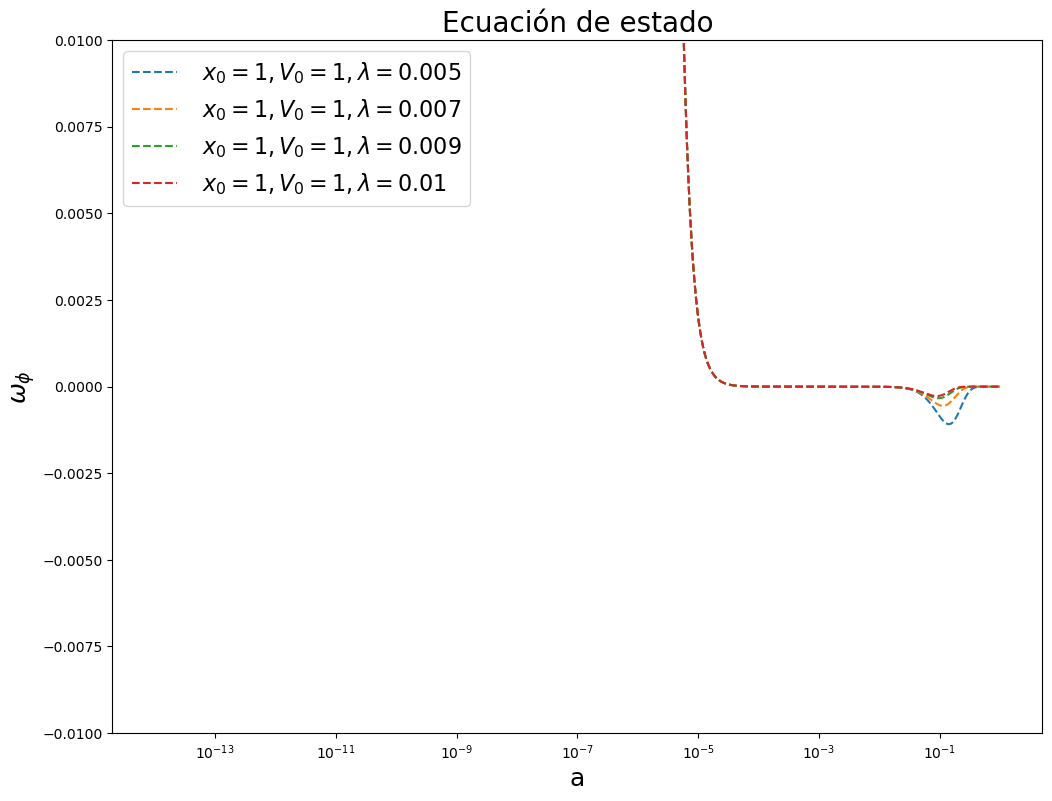

In [31]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations3[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all3[i], w_sch_all3[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

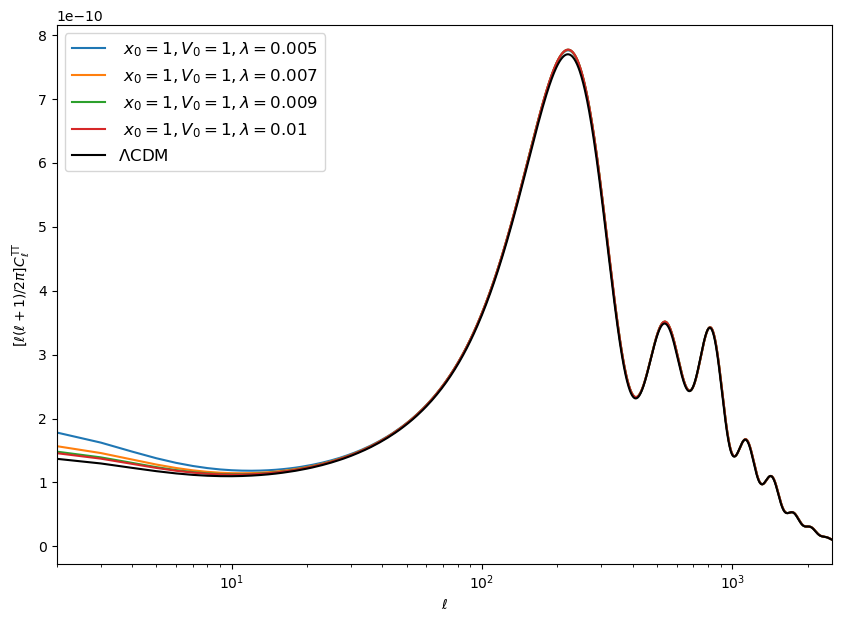

In [32]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x3, V03, lam3) in enumerate(combinations3[:4]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x3}, V_0 = {V03}, \lambda = {lam3}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

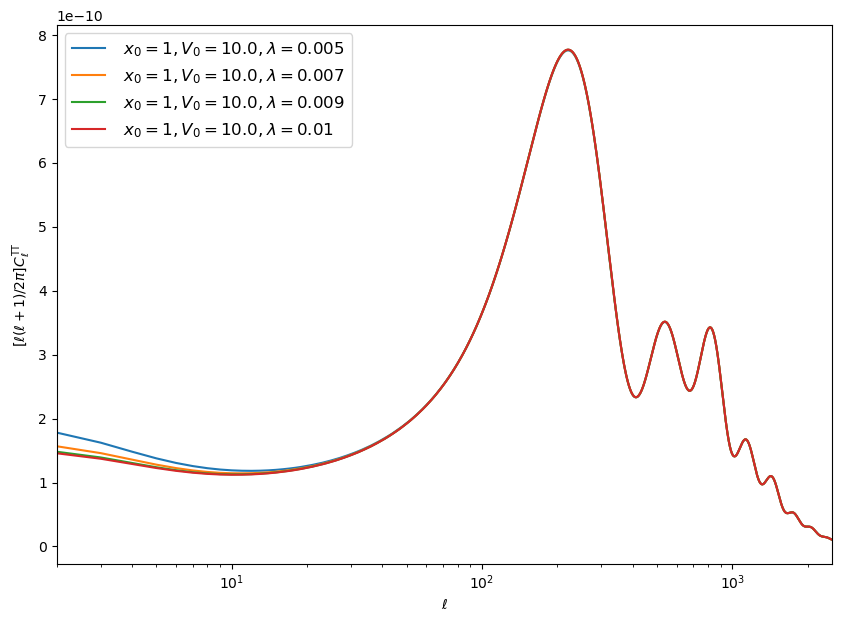

In [33]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x3, V03, lam3) in enumerate(combinations3[4:8]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x3}, V_0 = {V03}, \lambda = {lam3}$")
plt.legend(fontsize=12)
plt.show()

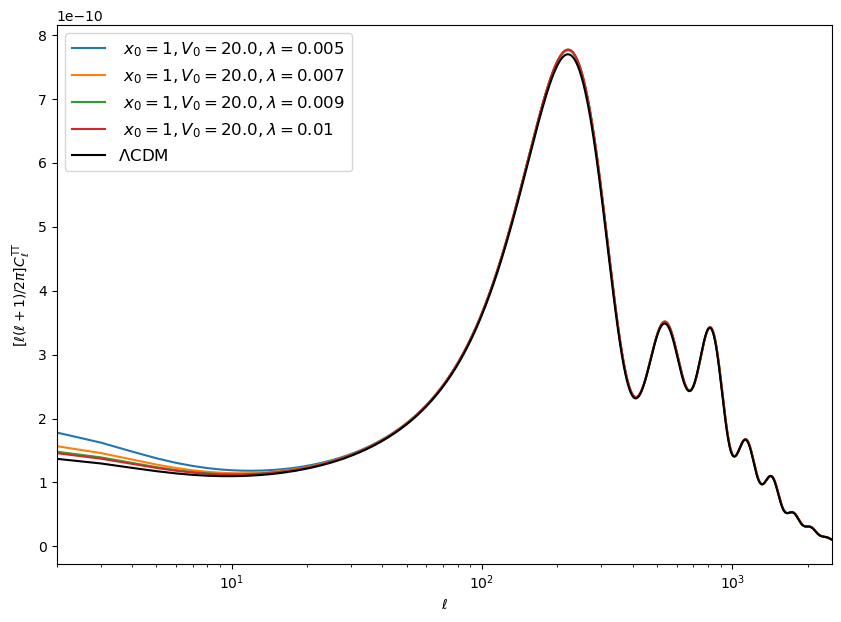

In [34]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x3, V03, lam3) in enumerate(combinations3[8:12]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x3}, V_0 = {V03}, \lambda = {lam3}$")

#plt.plot(ll,clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
   
plt.legend(fontsize=12)
plt.show()

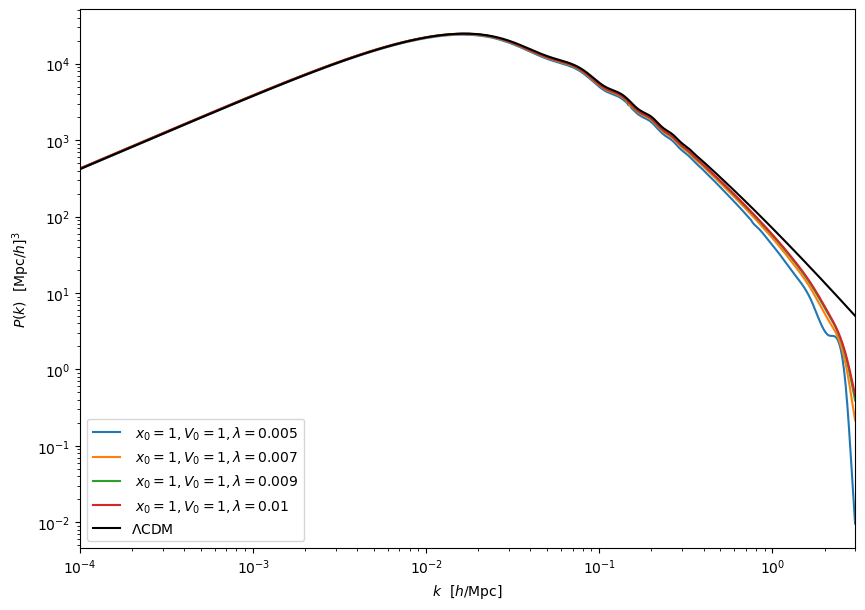

In [35]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x03, V03, lam3) in enumerate(combinations3[:4]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x03}, V_0 = {V03}, \lambda = {lam3}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

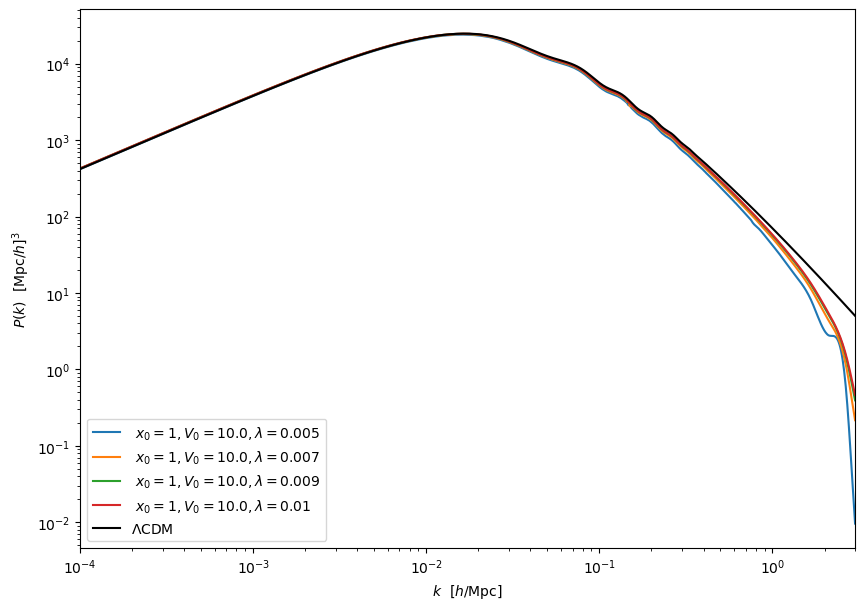

In [36]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x03, V03, lam3) in enumerate(combinations3[4:8]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x03}, V_0 = {V03}, \lambda = {lam3}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

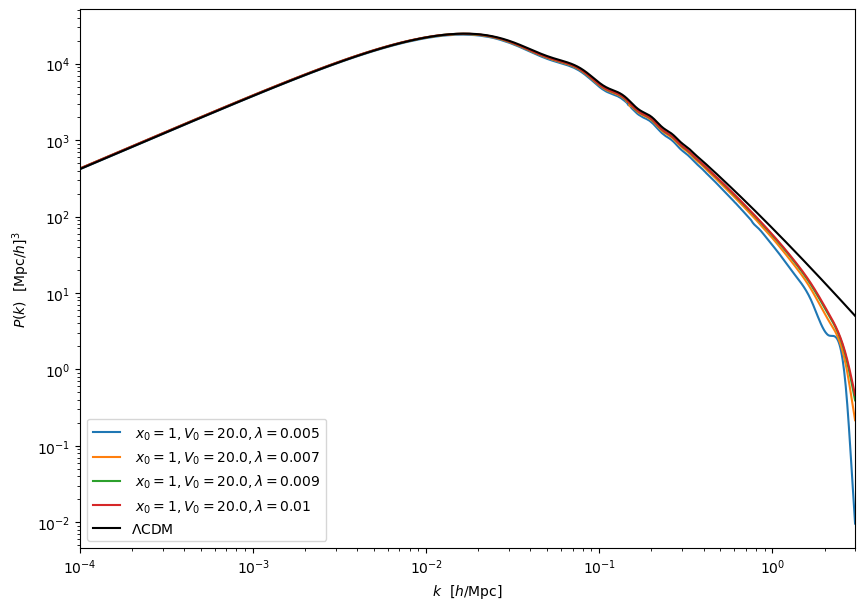

In [37]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x03, V03, lam3) in enumerate(combinations3[8:12]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x03}, V_0 = {V03}, \lambda = {lam3}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [38]:
common_settings4 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-18,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable4 = [1e1]
V0_variable4 = [1, 1e1, 3e1]
lambda_variable4 = [7e-4, 1e-3, 1e-2,1e-2]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations4 = list(itertools.product(x_variable4, V0_variable4, lambda_variable4))

# Background
z_all4 = []
a_all4 = []
Omega_rad_all4 = []
Omega_bar_all4 = []
Omega_lambda_all4 = []
Omega_sch_all4 = []
w_sch_all4 = []
rho_rel_all4 = []

# Listas para perturbaciones lineales
clTT_all4 = []
clEE_all4 = []
clPP_all4 = []
Pk_all4 = []
ll_all4 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x4, V04, lam4 in combinations4:
    common_settings4['x0_schm'] = x4        # Actualizar el valor de x0_schm
    common_settings4['V0_schm'] = V04       # Actualizar el valor de V0_schm
    common_settings4['lambda_schm'] = lam4  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x4},V0={V04}, lambda={lam4}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings4)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all4.append(z)
    a_all4.append(a)
    Omega_rad_all4.append(Omega_rad)
    Omega_bar_all4.append(Omega_bar)
    Omega_lambda_all4.append(Omega_lambda)
    Omega_sch_all4.append(Omega_sch)
    w_sch_all4.append(w_sch)
    rho_rel_all4.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all4.append(clTT)
    clEE_all4.append(clEE)
    clPP_all4.append(clPP)
    ll_all4.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all4.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x4},V0={V04}, lambda={lam4}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.0007
El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.0007
iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.001


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26416
aquí voy y todo bien 2.80909
aquí voy y todo bien 2.03662
aquí voy y todo bien 2.11043
aquí voy y todo bien 2.07353
aquí voy y todo bien 2.10966
aquí voy y todo bien 2.09159
aquí voy y todo bien 2.10966
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26228
aquí voy y todo bien 2.77924
aquí voy y todo bien 2.02076
aquí voy y todo bien 2.09499
aquí voy y todo bien 2.05788
aquí voy y todo bien 2.09424
aquí voy y todo bien 2.07606
aquí voy y todo bien 2.09424


El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.001
iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.01
El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26054
aquí voy y todo bien 2.75226
aquí voy y todo bien 2.0064
aquí voy y todo bien 2.08097
aquí voy y todo bien 2.04368
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.06195
aquí voy y todo bien 2.08022
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26054
aquí voy y todo bien 2.75226
aquí voy y todo bien 2.0064
aquí voy y todo bien 2.08097
aquí voy y todo bien 2.04368
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.06195
aquí voy y todo bien 2.08022


El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.0007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29761
aquí voy y todo bien 3.45045
aquí voy y todo bien 2.37403
aquí voy y todo bien 2.42905
aquí voy y todo bien 2.40154
aquí voy y todo bien 2.42823
aquí voy y todo bien 2.42864
aquí voy y todo bien 2.42823


El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.0007
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.001
El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.001
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.27824
aquí voy y todo bien 3.05051
aquí voy y todo bien 2.16437
aquí voy y todo bien 2.23337
aquí voy y todo bien 2.19887
aquí voy y todo bien 2.23252
aquí voy y todo bien 2.2157
aquí voy y todo bien 2.23252
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2607
aquí voy y todo bien 2.75469
aquí voy y todo bien 2.00769
aquí voy y todo bien 2.08223
aquí voy y todo bien 2.04496
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06322
aquí voy y todo bien 2.08148


El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.01
El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.0007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2607
aquí voy y todo bien 2.75469
aquí voy y todo bien 2.00769
aquí voy y todo bien 2.08223
aquí voy y todo bien 2.04496
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06322
aquí voy y todo bien 2.08148
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.37686
aquí voy y todo bien 6.88316
aquí voy y todo bien 4.13001
aquí voy y todo bien 3.85548
aquí voy y todo bien 3.99275
aquí voy y todo bien 3.85717
aquí voy y todo bien 3.92496
aquí voy y todo bien 3.85717
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.31483
aquí voy y todo bien 3.88819
aquí voy y todo bien 2.60151
aquí voy y todo bien 2.63484
aquí voy y todo bien 2.61817
aquí voy y todo bien 2.63422
aquí voy y todo bien 2.63453
aquí voy y todo bien 2.63422


El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.0007
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.001
El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.001
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.01
El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26106
aquí voy y todo bien 2.76008
aquí voy y todo bien 2.01057
aquí voy y todo bien 2.08505
aquí voy y todo bien 2.04781
aquí voy y todo bien 2.0843
aquí voy y todo bien 2.06605
aquí voy y todo bien 2.0843


El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.01
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26106
aquí voy y todo bien 2.76008
aquí voy y todo bien 2.01057
aquí voy y todo bien 2.08505
aquí voy y todo bien 2.04781
aquí voy y todo bien 2.0843
aquí voy y todo bien 2.06605
aquí voy y todo bien 2.0843


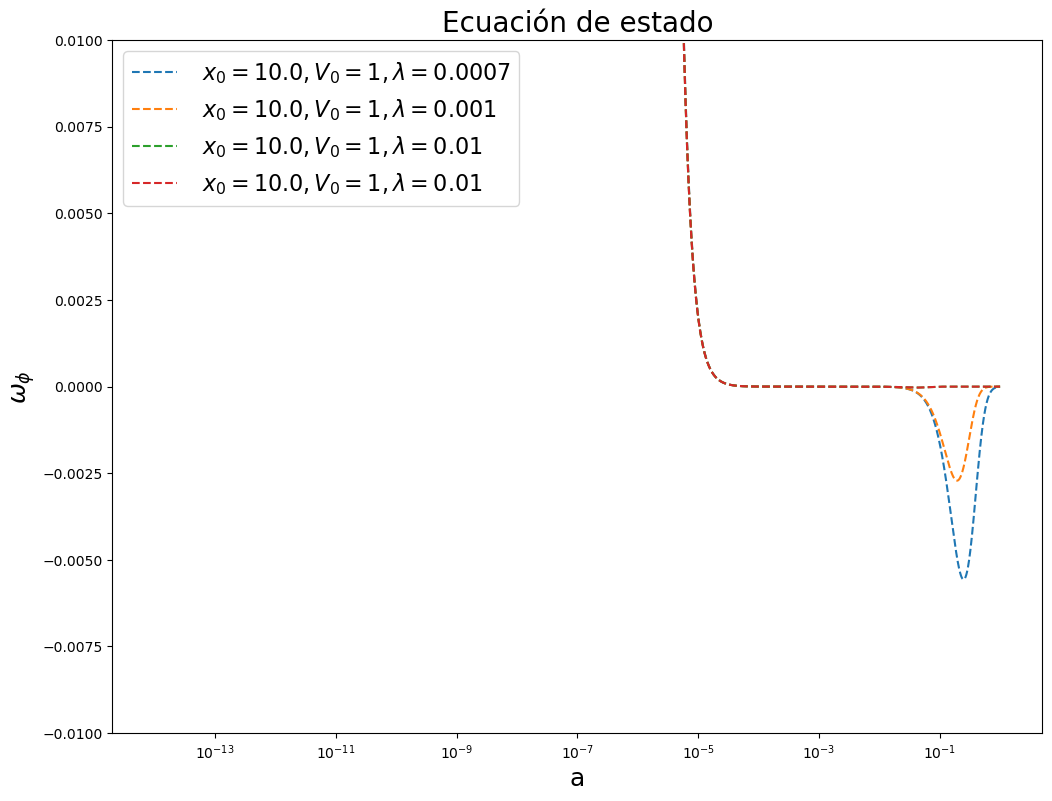

In [39]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations4[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all4[i], w_sch_all4[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

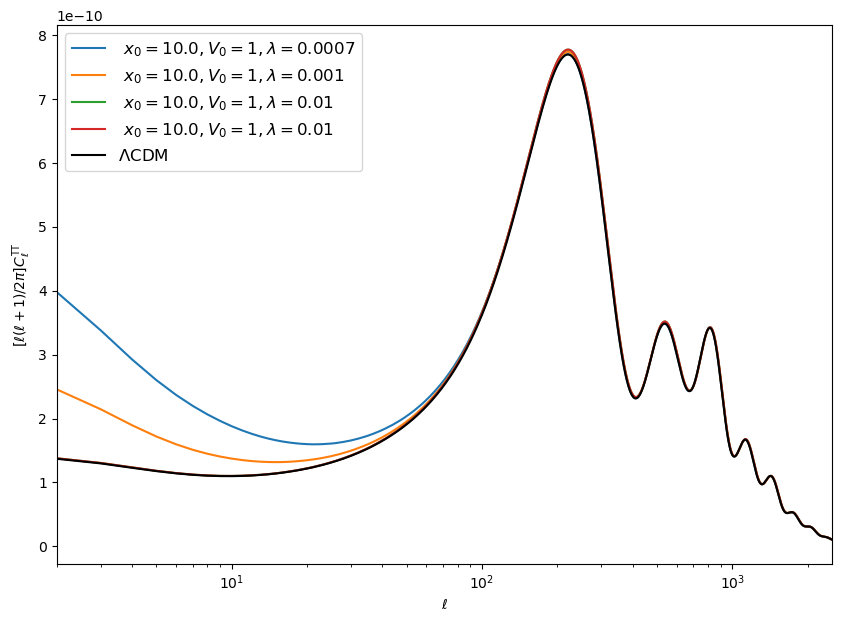

In [40]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations4[:4]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

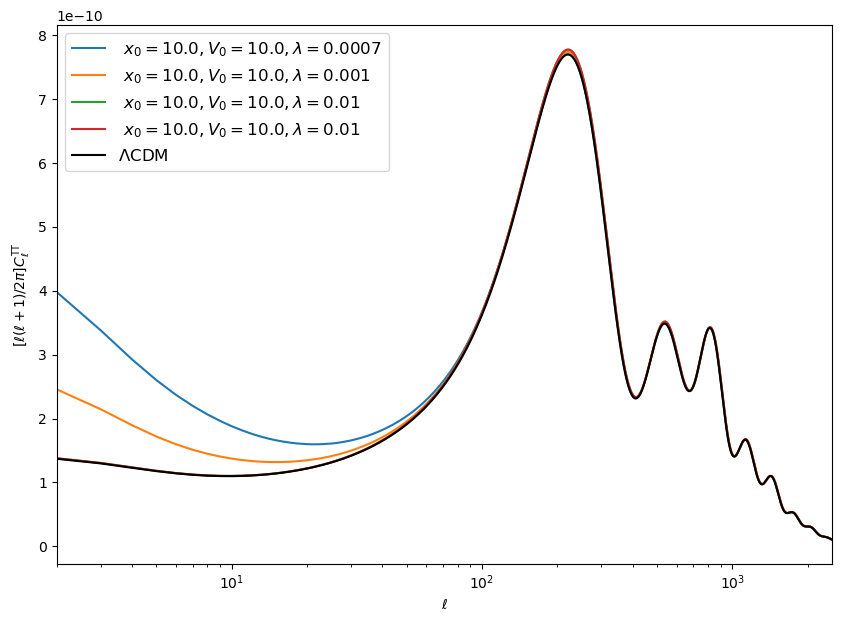

In [41]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations4[4:8]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

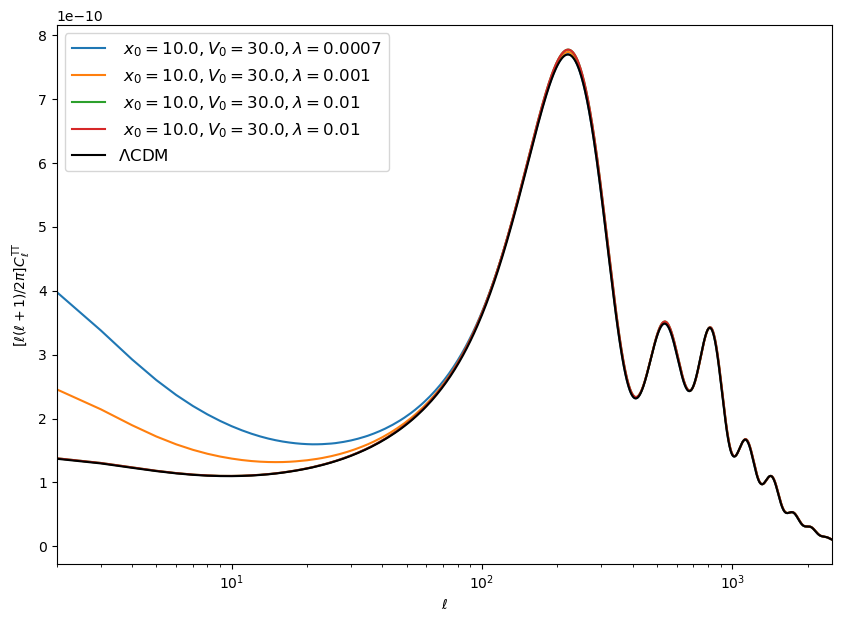

In [42]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations4[8:12]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")


plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
#plt.plot(ll,clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

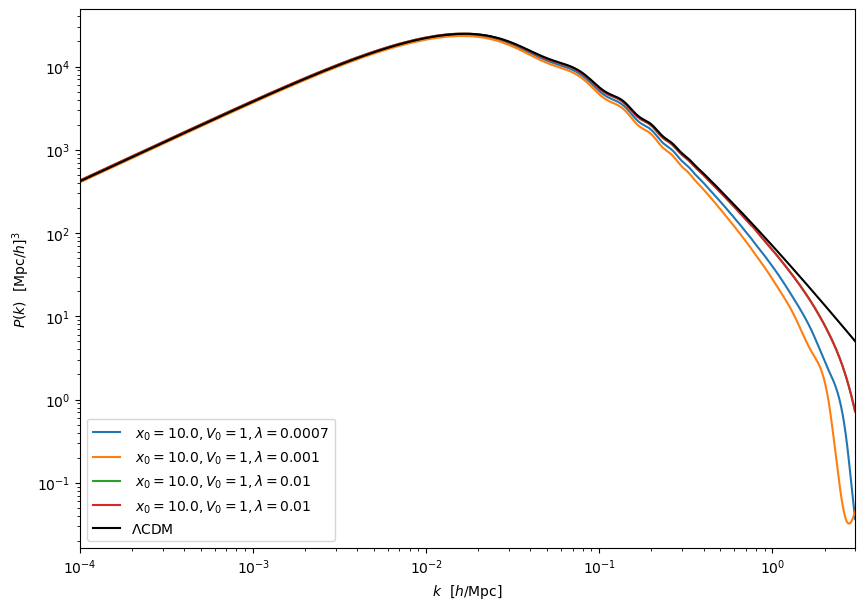

In [43]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations4[:4]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

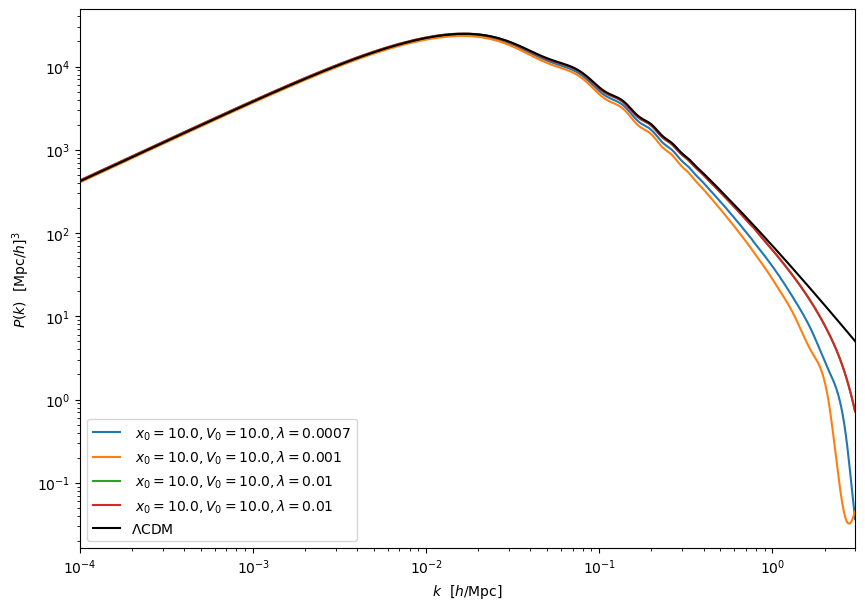

In [44]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations4[4:8]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

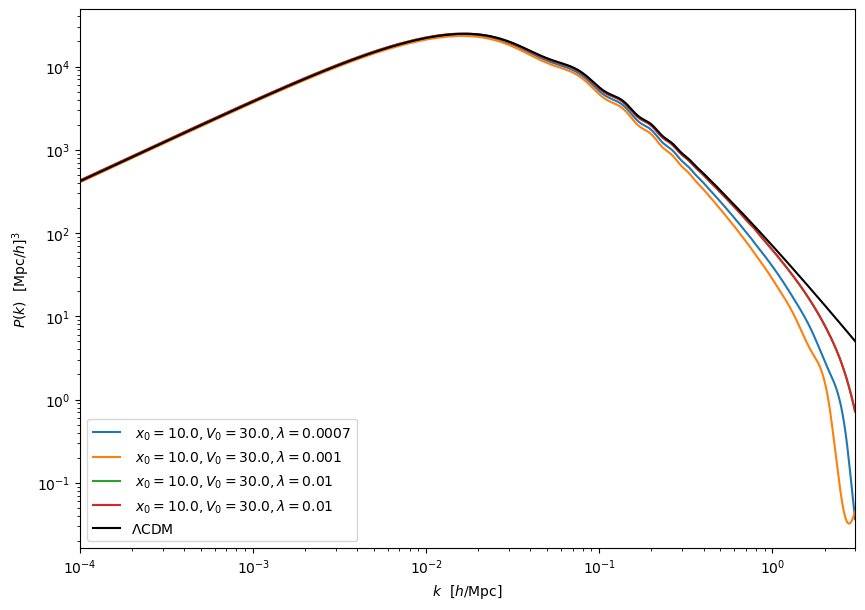

In [45]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations4[8:12]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

#plt.legend(fontsize=12)
plt.figure(figsize=(12, 9))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations):
    plt.plot(ll_all[i], clTT_all[i]*ll_all[i]*(ll_all[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")
plt.legend(fontsize=5)
plt.show()